<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/Presentation_1_Hina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest
import os 
# libraries for plots 
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#other
from datetime import datetime
from scipy.stats import normaltest
#!pip install matplotlib --upgrade matplotlib
#!pip install seaborn --upgrade seaborn

# Functions used in the code 


## Function to add value labels top each bar

In [3]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0  :
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size=8)                      # Vertically align label differently for
                                        # positive and negative values.

## Function to evaluate descriptive statistics 

In [4]:
#Function for descriptive analysis
def eda(frame,output):
    #output={}
    for col in frame.columns:
        mean=frame[col].mean()
        std= frame[col].std()
        percent_null= pd.isnull(frame[col]).sum()/len(frame[col])*100
        unique=len(pd.unique(frame[col]))
        outlier_df3= frame[(np.abs(stats.zscore(frame[col])) > 3)]
        outlier_df2= frame[(np.abs(stats.zscore(frame[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(frame)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(frame)
        min= frame[col].min()
        q25=frame[col].quantile(0.25)
        q50=frame[col].quantile(0.5)
        q75=frame[col].quantile(0.75)
        max= frame[col].max()
        skewness=frame[col].skew()
        kurtosis=frame[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

# Load data, name columns, adjust timestamp and merge data 

In [5]:
path1='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom.data?token=GHSAT0AAAAAABTMJQPCMEYJ4LIGT2V6TRG2YSS5ZWA'

df_features = pd.read_csv(path1,delimiter=' ',header=None)

path2='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom_labels.data?token=GHSAT0AAAAAABTMJQPCJP4OZMM573LK4Q7UYSS562A'

df_target=pd.read_csv(path2,delimiter=' ',header=None)

df_features.columns = ['feature'+str(x+1) for x in range(len(df_features.columns))]

df_target.columns=['status','timestamp']

#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
df_target['timestamp']=pd.to_datetime(df_target['timestamp'],dayfirst=True)

# merge the df_features 
df= pd.concat([df_features,df_target],axis=1)


# EDA

In [6]:
#dictionary for EDA
result={}
result=eda(df_features,result)
result1=pd.DataFrame.from_dict(result,orient='index')
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']

## Visualising Outliers

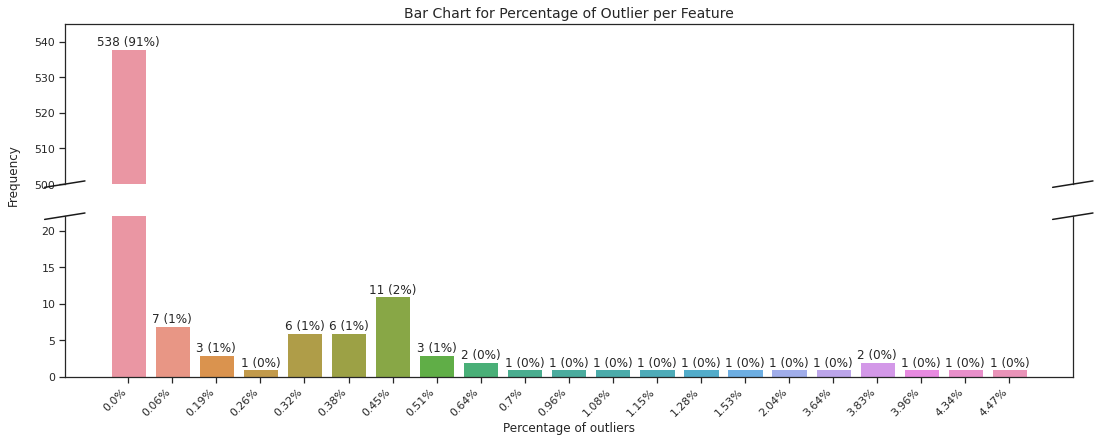

In [7]:
#broken axis bar chart for outlier percentage 
# set style for seaborn plot
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# create a color palette (we only have three different colors for the three different tests T1...T3)
pal = sns.color_palette(n_colors=3)
#shared x axis
f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(20, 7))
ax1 = sns.countplot(x='count_3s_perc',data=result1, ax=ax1)
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# we basically do the same thing again for the second plot
ax2 = sns.countplot(x='count_3s_perc',data=result1, ax=ax2)

ax1.set_ylim(500, 545)
ax2.set_ylim(0, 22)
# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)
# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_title("Bar Chart for Percentage of Outlier per Feature", size=14)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage of outliers", size=12 )
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.11, 0.55,"Frequency", va="center", rotation="vertical")

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
#xlabels = ['{:,.3f}'.format(x) + '%' for x in ax2.get_xticks()]
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=45,ha="right")

abs_values = result1['count_3s_perc'].value_counts().sort_index()
rel_values = result1['count_3s_perc'].value_counts(normalize=True).sort_index().values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax1.bar_label(container=ax1.containers[0], labels=lbls)
ax2.bar_label(container=ax2.containers[0], labels=lbls)
#labels = [f' {v.get_width()}\n {df.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]


# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)
#add_value_labels(ax2,5)

# label each bar in histogram
#plt.show()
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()


### Visualising onlt those features which have outlier 

Text(0.5, 1.0, 'Percentage of Outliers Per Feature > 0%')

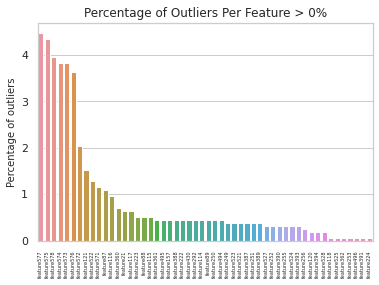

In [9]:
#visualizing features having outliers
result1_out= result1.loc[result1['count_3s_perc'] > 0]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=result1_out.index, y=result1_out['count_3s_perc'], data=result1_out, order=result1_out.sort_values('count_3s_perc',ascending = False).index)
#ax = sns.barplot(x=result1.index, y=result1['count_3s_perc'], data=result1, order=result1.sort_values('count_3s_perc',ascending = False).index)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=90,ha="right")
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_size(5)
ax.set_ylabel("Percentage of outliers", size=10 )
ax.set_title("Percentage of Outliers Per Feature > 0%", size=12 )

## Analysis of Target Variable

<AxesSubplot:>

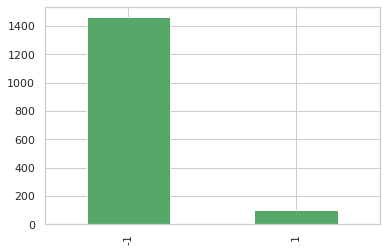

In [10]:
#frequency count of target variable before splitting# 
pass_fail = df['status'].unique()  # -1,1
clrs = ['r' if (x == 1) else 'g' for x in df['status'] ]
df['status'].value_counts().plot(kind = 'bar', color=clrs)# 1463 pass , 104 failb

### Distribution of Target Variable w.r.t Timestamps

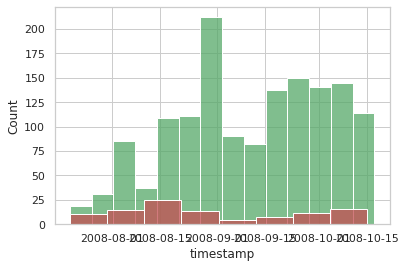

In [11]:
#distribution of Traget variable in terms of timestamp
sns.histplot( df[df.status == -1]['timestamp'], color = 'g');
sns.histplot( df[df.status == 1]['timestamp'], color = 'r');

#### Analysis of Target in differet timeframes (months,year,day etc.)

In [12]:
signal_df= df.copy(deep=True)

signal_df['year'] = pd.DatetimeIndex(signal_df['timestamp']).year
signal_df['month'] = pd.DatetimeIndex(signal_df['timestamp']).month
signal_df['month_name'] = pd.DatetimeIndex(signal_df['timestamp']).month_name()
signal_df['date'] = pd.DatetimeIndex(signal_df['timestamp']).day
signal_df['week_day'] = pd.DatetimeIndex(signal_df['timestamp']).weekday
signal_df['week_day_name'] = pd.DatetimeIndex(signal_df['timestamp']).day_name()
signal_df['start_time'] = pd.DatetimeIndex(signal_df['timestamp']).time
signal_df['hour'] = pd.DatetimeIndex(signal_df['timestamp']).hour
signal_df['min'] = pd.DatetimeIndex(signal_df['timestamp']).minute

#Checking

In [ ]:
signal_df.year.unique()
#signal_df.month.value_counts()
signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
signal_df.date.unique()

##### Grid Plot

findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.


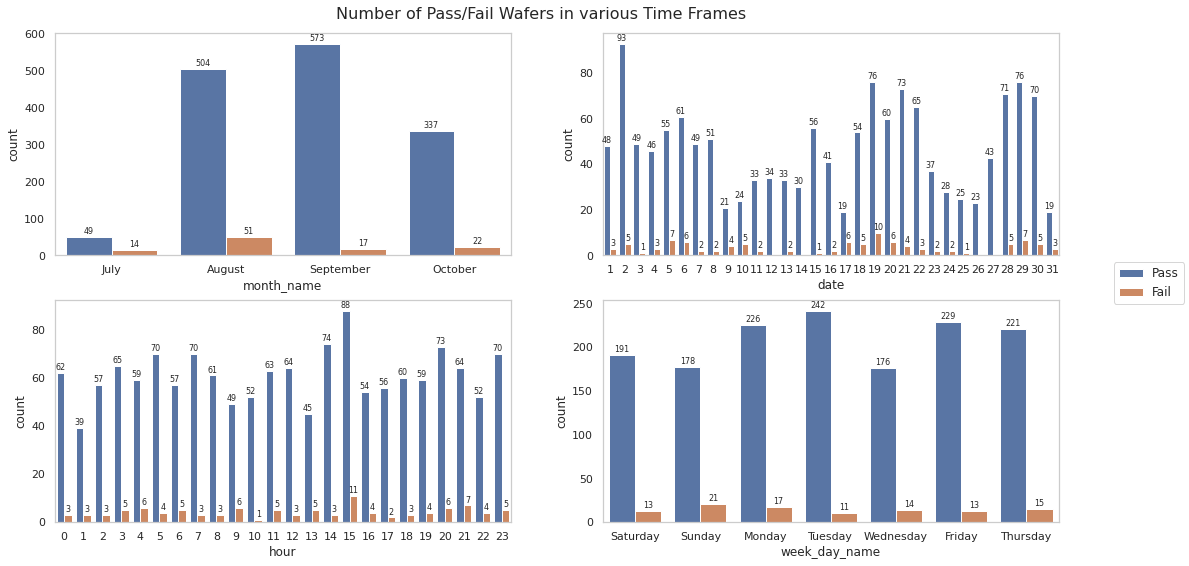

In [13]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(18, 9))

mx, dx, wx, hx = axes.flatten()
sns.set(style="whitegrid", font="CMU Sans Serif" )
mx=sns.countplot(ax=axes[0, 0],data=signal_df, x="month_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
mx.get_legend().remove()
add_value_labels(mx,1)
#mx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
dx=sns.countplot(ax=axes[0, 1],data=signal_df, x="date",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
dx.get_legend().remove()
add_value_labels(dx,1)
#dx.legend(['Pass','Fail'])
sns.set(style="whitegrid", font="CMU Sans Serif" )
wx=sns.countplot(ax=axes[1, 1],data=signal_df, x="week_day_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
wx.get_legend().remove()
add_value_labels(wx,1)
#wx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
hx=sns.countplot(ax=axes[1, 0],data=signal_df, x="hour",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
hx.get_legend().remove()
add_value_labels(hx,1)
#hx.legend(['Pass','Fail'])
handles, labels = mx.get_legend_handles_labels()
fig.legend(handles,['Pass','Fail'] ,loc='center right', fontsize='medium')
fig.suptitle("Number of Pass/Fail Wafers in various Time Frames", fontsize=16,y=0.92)

plt.show()

# Splitting Train and Test Data 

In [15]:
#separate target variable and remaining data
x = df.iloc[:,:590]
y = df.iloc[:,590]

# splitting df into train test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)# random state = fix the random generator (same data all time)
#startify preserves the same proportions of examples in each class as observed in the original dataset- imbalance data .

#Checking

In [ ]:
#frequency count of target varaible in training and test data separately (after splitting)
#x_train - 1253.590
#x_test - 314.590
#y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)
y_train.value_counts(normalize=True).plot(kind='bar')
y_train=y_train.to_frame()
y_train['index']=y_train.index
y_train
sns.histplot(data=y_train,x=y_train[y_train['status'] == -1]['index'],kde=True,color='g')
sns.histplot(data=y_train,x=y_train[y_train['status'] == 1]['index'],kde=True,color='r')
x_train


## EDA Training data 

In [16]:
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)

xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')

xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


### Null/Missing Value in Train data set

#Checking

In [ ]:
result1['percent_null'].hist()

"""Before split and after split the trend of missing percent values are same
important thresholds:
- big jump from 17% to 45%
- after 45% , more number of columns show 65% null values , therefore threshold should be between 55% to 65%
"""

result1.percent_null.value_counts().sort_index()

xtrain_eda1.percent_null.value_counts().sort_index()

<AxesSubplot:xlabel='percent_null', ylabel='Count'>

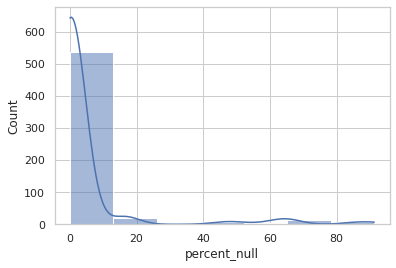

In [18]:
sns.histplot(data=xtrain_eda1, x='percent_null',bins=7, kde=True)

### Standard deviation Before and after splitting

#### Std Before split 

<AxesSubplot:xlabel='std', ylabel='Count'>

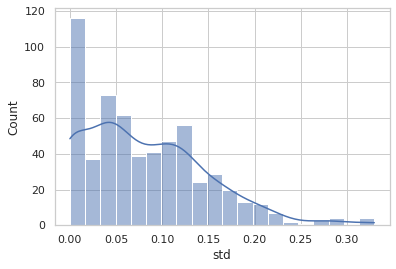

In [19]:
scaler = MinMaxScaler()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.

data_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
data_scaled_desc=data_scaled.describe().T

sns.histplot(data=data_scaled_desc, x='std',bins=20, kde=True)

#### Std After Split

<AxesSubplot:xlabel='std', ylabel='Count'>

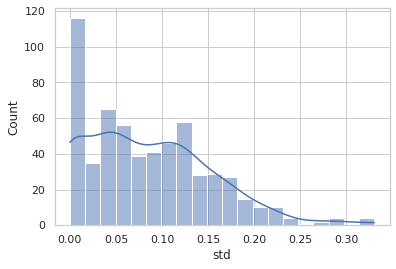

In [20]:
xtrain_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
xtrain_scaled_desc=xtrain_scaled.describe().T
#xtrain_scaled_desc['std'].value_counts().sort_index()

sns.histplot(data=xtrain_scaled_desc, x='std',bins=20, kde=True)

# Appendix

#initial working on EDA

## Binning of desc stats 

In [22]:
tranform=result1.copy(deep=True)
#Checking
#tranform['std'].value_counts()
#tranform['unique'].value_counts()
#tranform['count_3s'].value_counts()
#tranform['count_2s'].value_counts()

## Bins for null values
bins_null=[0,1,5,20,55,75,95]
labels_null=['<=1','1-5','5 -20','20-55','55-75','75-95']
tranform['null_bin']= pd.cut(tranform['percent_null'], bins_null,labels=labels_null,right=True)
#bins for unique values
bins_unique=[0,2,10,100,500,np.inf] # np.inf for greater than 500
labels_unique=['>=2','2-10','10-100','100-500','>500']
tranform['unique_bin']= pd.cut(tranform['unique'], bins_unique,labels=labels_unique,right=True)
#bins for 3s outliers
#bins_3s=[0,1,11,31,51,71] 
#labels_3s=['<1','1-10','11-30','31-50','51-70']
#tranform['3s_bin']= pd.cut(tranform['count_3s'], bins_3s,labels=labels_3s,right=False)
#bins for 2s influentials
#bins_2s=[0,1,11,31,51,71,np.inf] 
#labels_2s=['<1','1-10','11-30','31-50','51-70','>70']
#tranform['2s_bin']= pd.cut(tranform['count_2s'], bins_2s,labels=labels_2s,right=False)
#skewness
skew_bin=[-np.inf,-1,0,np.inf]
labels_skew=['left_skewed','normal or slightly skewed','right skewed']
tranform['skew_bin']= pd.cut(tranform['skewness'], skew_bin,labels=labels_skew,right=False)


# Checking


In [24]:
#checking for binned data
### Check binned data
null_counts= tranform['null_bin'].value_counts().sort_index()# sort_index to sort the left column of rows 
#pd.crosstab(index=tranform["null_bin"], columns="count")
null_counts

unique_counts=tranform['unique_bin'].value_counts().sort_index()
unique_counts

#bin3s_count=tranform['3s_bin'].value_counts().sort_index()
#bin3s_count

#bin2s_count=tranform['2s_bin'].value_counts().sort_index()
#bin2s_count

skew_counts=tranform['skew_bin'].value_counts().sort_index()
skew_counts

left_skewed                   31
normal or slightly skewed     50
right skewed                 509
Name: skew_bin, dtype: int64

### Visualising binned data

# timestamp and target variable graphical code 

In [ ]:

#df.index.month_name()
#replace x axis with month names 
import matplotlib.dates as mdates
mx.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.show()

sns.histplot(data=signal_df,x=signal_df[signal_df['status'] == -1]['month'],kde=True,color='g')
sns.histplot(data=signal_df,x=signal_df[signal_df['status'] == 1]['month'],kde=True,color='r')

#sns.set(rc={'figure.figsize':(11.7,8.27)})
#fig, ax = plt.subplots()
sns.histplot(data=signal_df, x="month", hue="status",stat="probability", discrete=True,);
fig.tight_layout()
fig.savefig('fig.pdf')

data_pass=df.loc[df['status']== -1]
data_fail=df.loc[df['status']== 1]

#sns.frequencyplot( df[df.status == -1]['index'], color = 'g');
#sns.scatterplot( df[df.status == 1]['index'], color = 'r');
sns.histplot(data=df,x=df[df['status'] == -1]['timetsamp'],kde=True,color='g')
sns.histplot(data=data_fail,x=df[df['status'] == 1]['timestamp'],kde=True,color='r')